In [ ]:
import os

# Создаём папки
os.makedirs("project/src", exist_ok=True)
os.makedirs("project/data", exist_ok=True)
os.makedirs("project/results", exist_ok=True)

# Создаём пустые файлы
open("project/README.md", "w").close()
open("project/requirements.txt", "w").close()
open("project/src/train.py", "w").close()
open("project/src/model.py", "w").close()
open("project/data/cifar10_subset.py", "w").close()
open("project/results/comparison_table.csv", "w").close()


In [ ]:
with open("project/requirements.txt", "w") as f:
    f.write("torch==2.1.0\ntorchvision==0.16.0\nnumpy==1.24.4\nmatplotlib==3.8.0\n")


In [ ]:
%cd /content/project/src

/content/project/src


In [ ]:
!python train.py


--- Training with ReLU + SGD ---
Epoch 1/10 | Train Loss: 1.4286 | Train Acc: 0.5716 | Val Acc: 0.5750
Epoch 2/10 | Train Loss: 0.6698 | Train Acc: 0.7482 | Val Acc: 0.6997
Epoch 3/10 | Train Loss: 0.5852 | Train Acc: 0.7824 | Val Acc: 0.7325
Epoch 4/10 | Train Loss: 0.5322 | Train Acc: 0.8017 | Val Acc: 0.6175
Epoch 5/10 | Train Loss: 0.4976 | Train Acc: 0.8172 | Val Acc: 0.7528
Epoch 6/10 | Train Loss: 0.4500 | Train Acc: 0.8360 | Val Acc: 0.7993
Epoch 7/10 | Train Loss: 0.4346 | Train Acc: 0.8410 | Val Acc: 0.7562
Epoch 8/10 | Train Loss: 0.4244 | Train Acc: 0.8470 | Val Acc: 0.8423
Epoch 9/10 | Train Loss: 0.4133 | Train Acc: 0.8516 | Val Acc: 0.8235
Epoch 10/10 | Train Loss: 0.4033 | Train Acc: 0.8561 | Val Acc: 0.8123
Training time for ReLU + SGD: 311.81 seconds

--- Training with ReLU + Momentum ---
Epoch 1/10 | Train Loss: 0.7474 | Train Acc: 0.7232 | Val Acc: 0.7995
Epoch 2/10 | Train Loss: 0.4111 | Train Acc: 0.8500 | Val Acc: 0.8538
Epoch 3/10 | Train Loss: 0.3579 | Train A

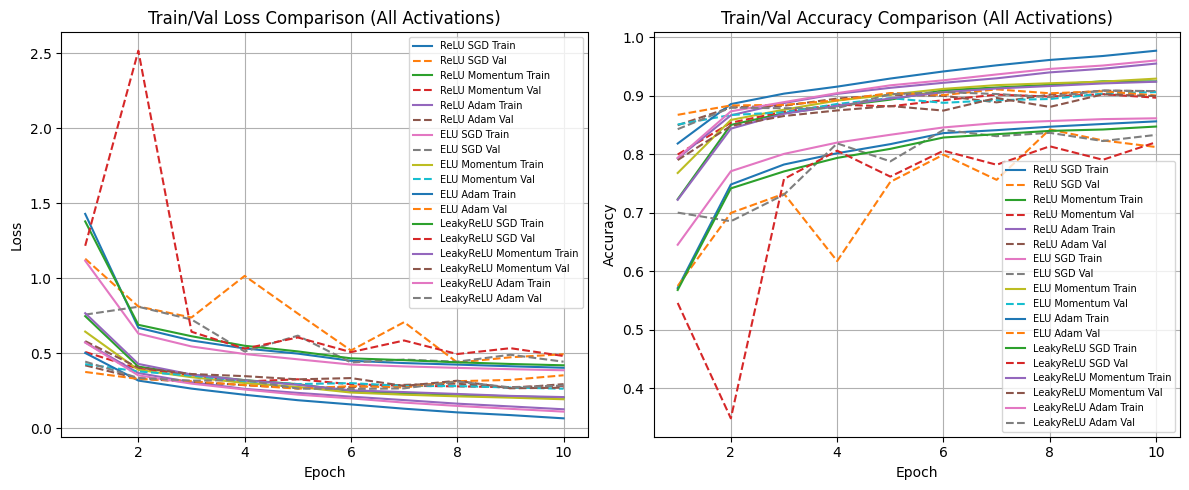

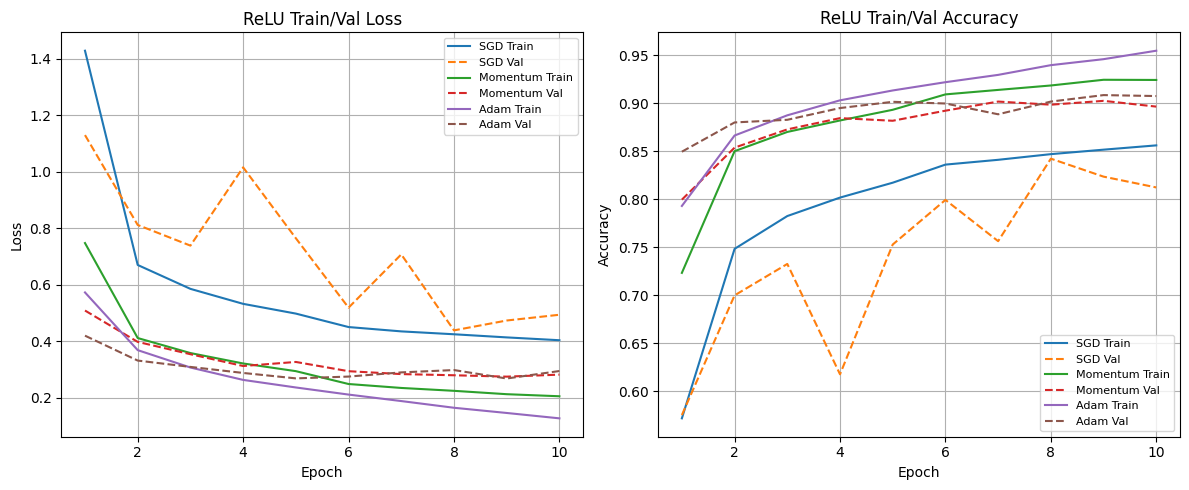

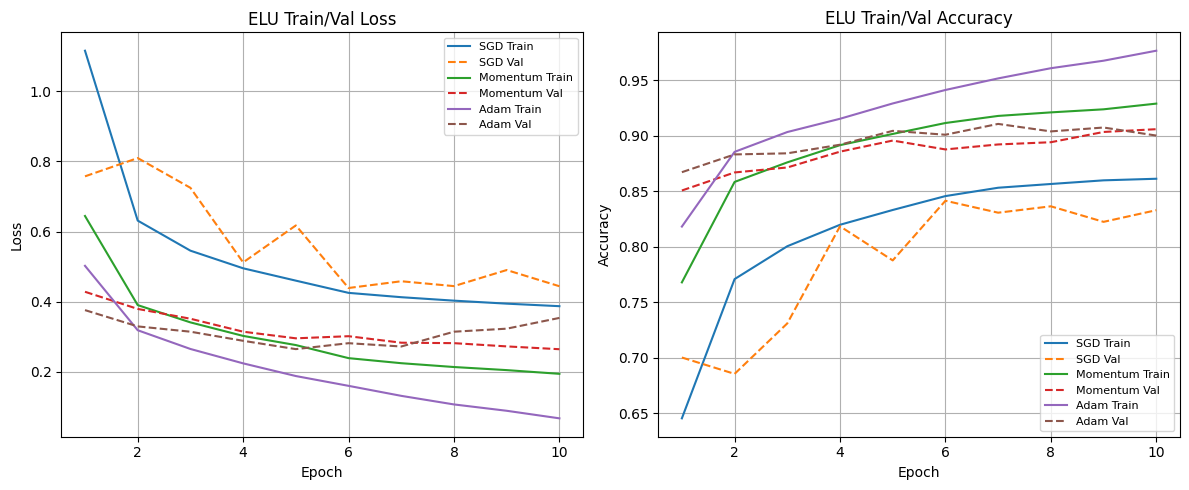

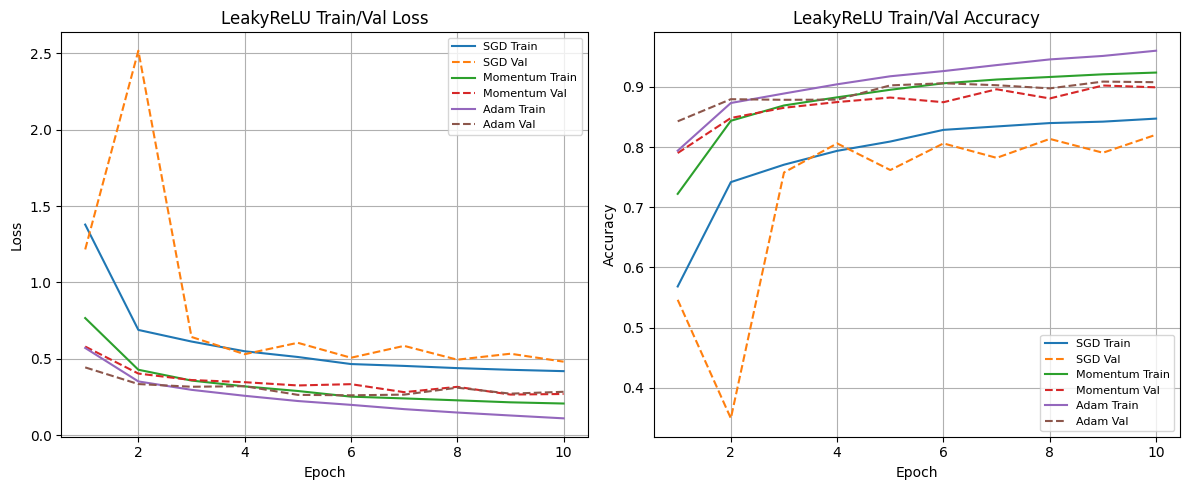

Summary table saved to /content/project/results/activation_summary.csv
  Activation Optimizer  Train Loss  Val Loss  Train Acc  Val Acc  \
0       ReLU       SGD    0.403315  0.493518   0.856095  0.81225   
1       ReLU  Momentum    0.204888  0.281464   0.924286  0.89650   
2       ReLU      Adam    0.126675  0.294263   0.954762  0.90750   
3        ELU       SGD    0.386697  0.443668   0.861333  0.83300   
4        ELU  Momentum    0.193493  0.263760   0.929048  0.90600   
5        ELU      Adam    0.066322  0.353170   0.976714  0.90025   
6  LeakyReLU       SGD    0.419734  0.481735   0.847238  0.82050   
7  LeakyReLU  Momentum    0.208024  0.270412   0.923762  0.89925   
8  LeakyReLU      Adam    0.111048  0.284753   0.960095  0.90775   

   Time per Epoch (s)  
0           31.181347  
1           32.621686  
2           32.757342  
3           36.869151  
4           37.029427  
5           38.639038  
6           33.416172  
7           33.751943  
8           34.616655  


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ------------------------
# Папка с результатами
# ------------------------
results_dir = "/content/project/results"

# Загружаем CSV с результатами
df = pd.read_csv(os.path.join(results_dir, "training_history_fashionmnist.csv"))

# Получаем отдельные данные по активациям
relu_df = df[df["Activation"] == "ReLU"]
elu_df = df[df["Activation"] == "ELU"]
leakyrelu_df = df[df["Activation"] == "LeakyReLU"]

# ------------------------
# Общие графики Loss
# ------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for df_act, act_name in zip([relu_df, elu_df, leakyrelu_df], ["ReLU", "ELU", "LeakyReLU"]):
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        plt.plot(subset["Epoch"], subset["Train Loss"], label=f"{act_name} {optimizer} Train")
        plt.plot(subset["Epoch"], subset["Val Loss"], '--', label=f"{act_name} {optimizer} Val")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train/Val Loss Comparison (All Activations)")
plt.legend(fontsize=7)
plt.grid(True)

# ------------------------
# Общие графики Accuracy
# ------------------------
plt.subplot(1,2,2)
for df_act, act_name in zip([relu_df, elu_df, leakyrelu_df], ["ReLU", "ELU", "LeakyReLU"]):
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        plt.plot(subset["Epoch"], subset["Train Acc"], label=f"{act_name} {optimizer} Train")
        plt.plot(subset["Epoch"], subset["Val Acc"], '--', label=f"{act_name} {optimizer} Val")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train/Val Accuracy Comparison (All Activations)")
plt.legend(fontsize=7)
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(results_dir, "activation_comparison_all.png"))
plt.show()

# ------------------------
# Отдельные графики для каждой активации
# ------------------------
for df_act, act_name in zip([relu_df, elu_df, leakyrelu_df], ["ReLU", "ELU", "LeakyReLU"]):
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        plt.plot(subset["Epoch"], subset["Train Loss"], label=f"{optimizer} Train")
        plt.plot(subset["Epoch"], subset["Val Loss"], '--', label=f"{optimizer} Val")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{act_name} Train/Val Loss")
    plt.legend(fontsize=8)
    plt.grid(True)

    # Accuracy
    plt.subplot(1,2,2)
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        plt.plot(subset["Epoch"], subset["Train Acc"], label=f"{optimizer} Train")
        plt.plot(subset["Epoch"], subset["Val Acc"], '--', label=f"{optimizer} Val")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{act_name} Train/Val Accuracy")
    plt.legend(fontsize=8)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, f"{act_name}_comparison.png"))
    plt.show()

# ------------------------
# Сводная таблица последних эпох для всех активаций
# ------------------------
summary = []

for df_act, act_name in zip([relu_df, elu_df, leakyrelu_df], ["ReLU", "ELU", "LeakyReLU"]):
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        last_epoch = subset.iloc[-1]
        summary.append({
            "Activation": act_name,
            "Optimizer": optimizer,
            "Train Loss": last_epoch["Train Loss"],
            "Val Loss": last_epoch["Val Loss"],
            "Train Acc": last_epoch["Train Acc"],
            "Val Acc": last_epoch["Val Acc"],
            "Time per Epoch (s)": last_epoch["Time (s)"]
        })

summary_df = pd.DataFrame(summary)
summary_csv = os.path.join(results_dir, "activation_summary.csv")
summary_df.to_csv(summary_csv, index=False)
print(f"Summary table saved to {summary_csv}")
print(summary_df)


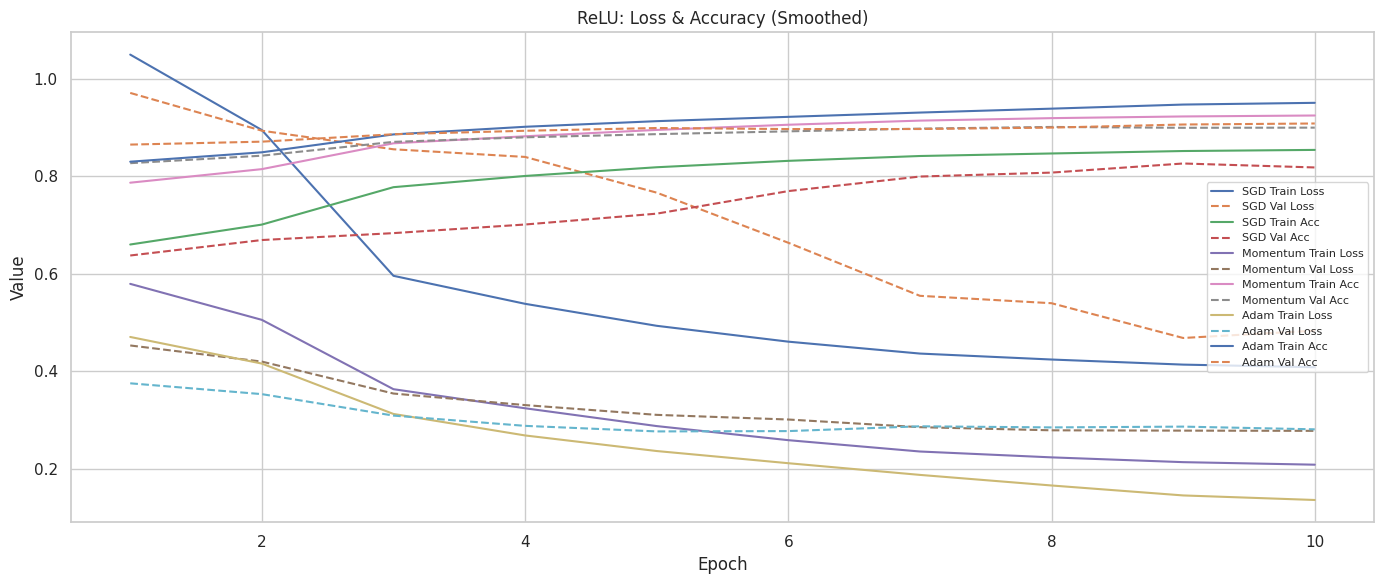

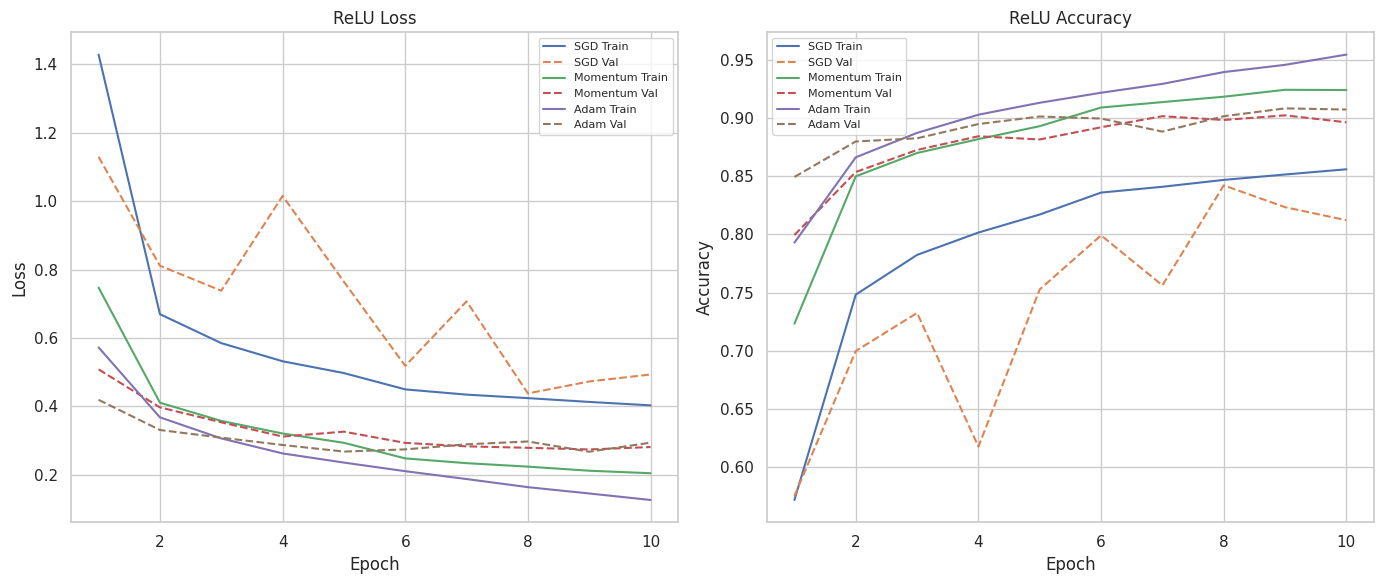

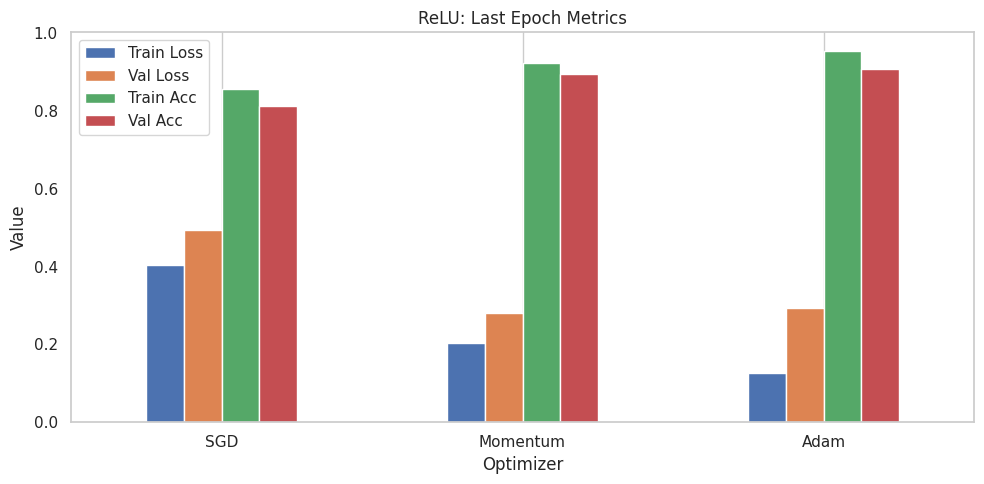

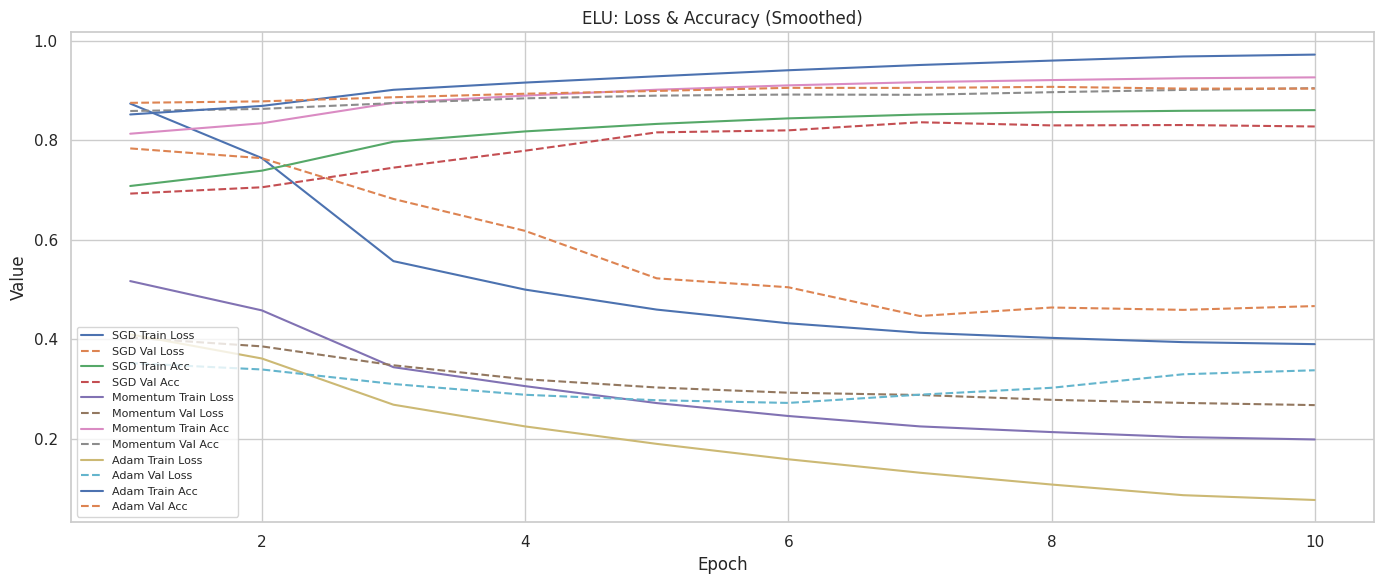

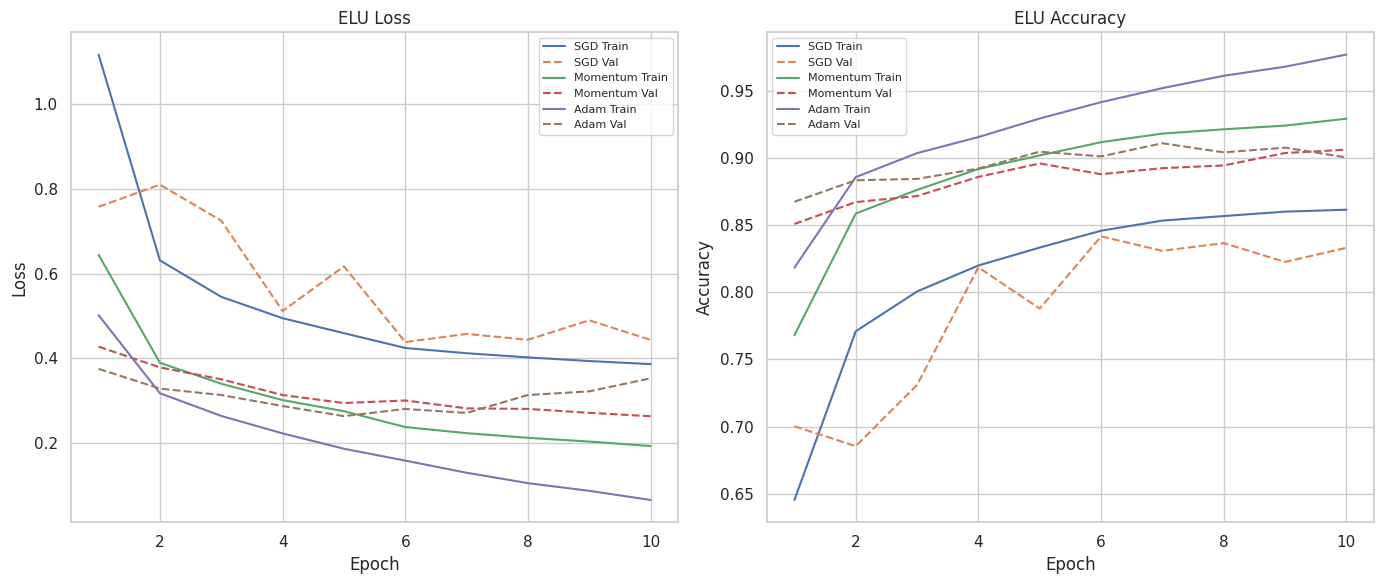

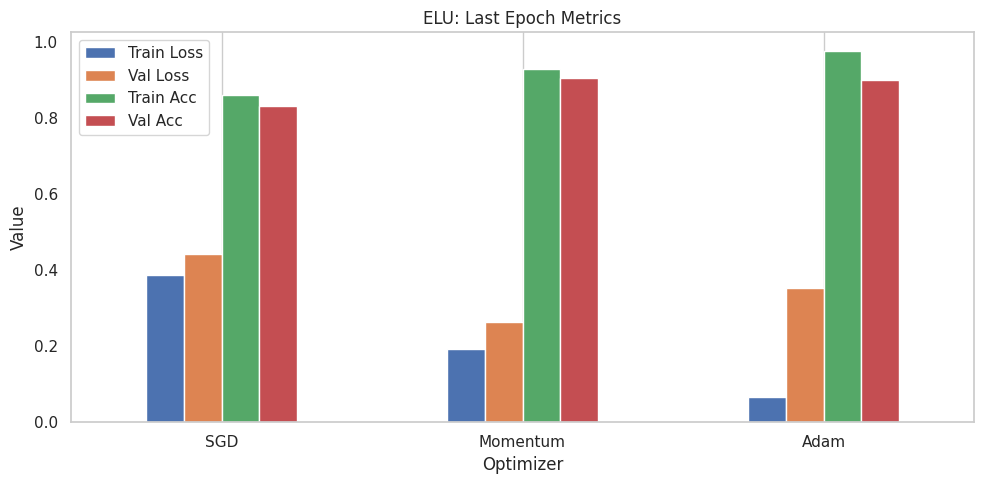

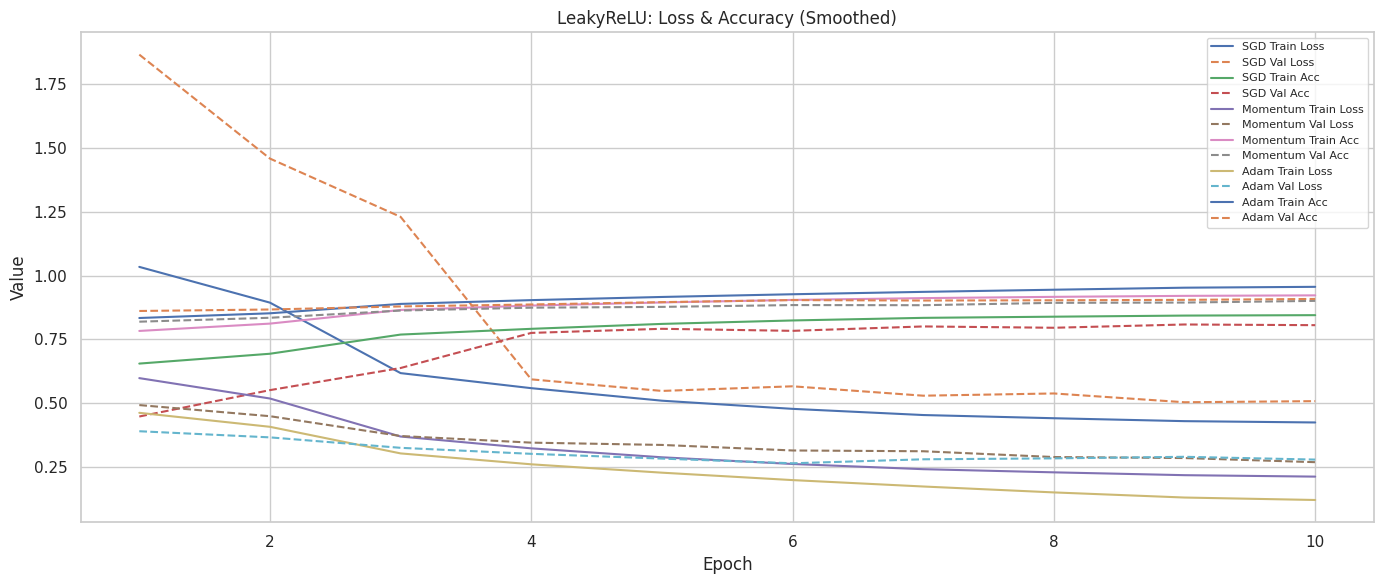

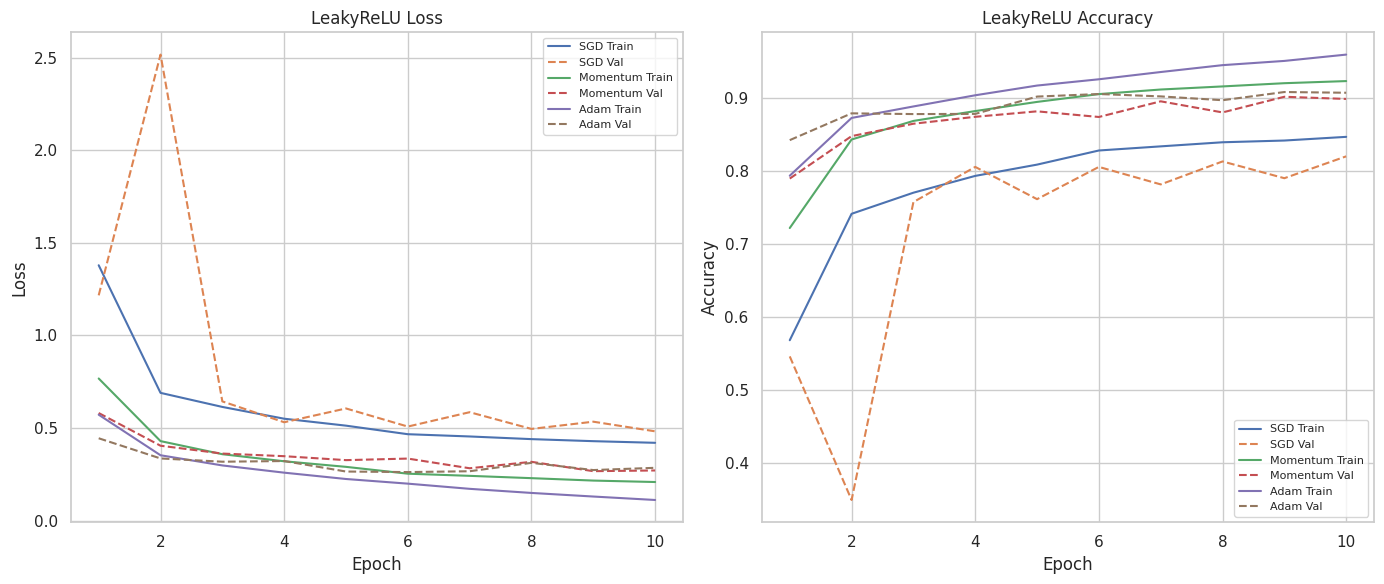

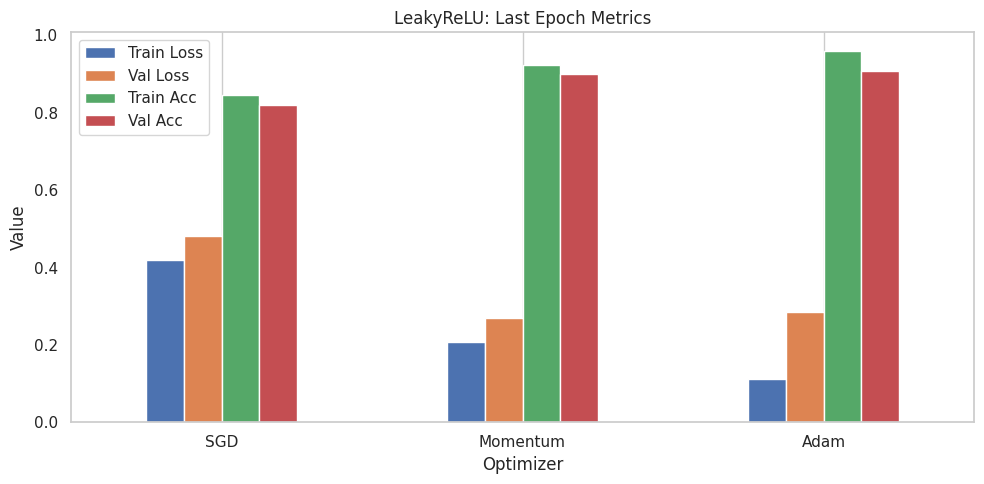

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")  # стиль графиков

results_dir = "/content/project/results"
df = pd.read_csv(os.path.join(results_dir, "training_history_fashionmnist.csv"))

# Получаем отдельные данные по активациям
activations = ["ReLU", "ELU", "LeakyReLU"]
activation_dfs = {act: df[df["Activation"] == act] for act in activations}

# ------------------------
# Функция для сглаживания кривых
# ------------------------
def smooth(series, window=3):
    return series.rolling(window, min_periods=1, center=True).mean()

# ------------------------
# Графики для каждой активации
# ------------------------
for act_name, df_act in activation_dfs.items():
    plt.figure(figsize=(14,6))

    # 1) Train/Val Loss и Accuracy на одном графике
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        plt.plot(subset["Epoch"], smooth(subset["Train Loss"]), label=f"{optimizer} Train Loss")
        plt.plot(subset["Epoch"], smooth(subset["Val Loss"]), '--', label=f"{optimizer} Val Loss")
        plt.plot(subset["Epoch"], smooth(subset["Train Acc"]), label=f"{optimizer} Train Acc")
        plt.plot(subset["Epoch"], smooth(subset["Val Acc"]), '--', label=f"{optimizer} Val Acc")

    plt.title(f"{act_name}: Loss & Accuracy (Smoothed)")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, f"{act_name}_loss_acc_combined.png"))
    plt.show()

    # 2) Отдельные графики Loss и Accuracy
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        plt.plot(subset["Epoch"], subset["Train Loss"], label=f"{optimizer} Train")
        plt.plot(subset["Epoch"], subset["Val Loss"], '--', label=f"{optimizer} Val")
    plt.title(f"{act_name} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(fontsize=8)
    plt.grid(True)

    plt.subplot(1,2,2)
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer]
        plt.plot(subset["Epoch"], subset["Train Acc"], label=f"{optimizer} Train")
        plt.plot(subset["Epoch"], subset["Val Acc"], '--', label=f"{optimizer} Val")
    plt.title(f"{act_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(fontsize=8)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, f"{act_name}_loss_acc_separate.png"))
    plt.show()

    # 3) Bar chart последних эпох
    last_values = []
    for optimizer in df_act["Optimizer"].unique():
        subset = df_act[df_act["Optimizer"] == optimizer].iloc[-1]
        last_values.append({
            "Optimizer": optimizer,
            "Train Loss": subset["Train Loss"],
            "Val Loss": subset["Val Loss"],
            "Train Acc": subset["Train Acc"],
            "Val Acc": subset["Val Acc"]
        })
    last_df = pd.DataFrame(last_values).set_index("Optimizer")
    last_df.plot(kind="bar", figsize=(10,5), rot=0)
    plt.title(f"{act_name}: Last Epoch Metrics")
    plt.ylabel("Value")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, f"{act_name}_last_epoch_bar.png"))
    plt.show()
